In [ ]:
pip install tensorflow-gpu

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
import tensorflow as tf


In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
import numpy as np

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
training_data=pd.read_csv('/content/training_set.csv')

In [ ]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2023,89.830002,91.550003,89.019997,89.699997,89.699997,20738500
1,04-01-2023,91.010002,91.239998,87.800003,88.709999,88.709999,27046500
2,05-01-2023,88.070000,88.209999,86.559998,86.769997,86.769997,23136100
3,06-01-2023,87.360001,88.470001,85.570000,88.160004,88.160004,26612600
4,09-01-2023,89.195000,90.830002,88.580002,88.800003,88.800003,22996700


In [ ]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,22-12-2023,142.130005,143.250000,142.054993,142.720001,142.720001,18494700
246,26-12-2023,142.979996,143.945007,142.500000,142.820007,142.820007,11170100
247,27-12-2023,142.830002,143.320007,141.050995,141.440002,141.440002,17288400
248,28-12-2023,141.850006,142.270004,140.828003,141.279999,141.279999,12192500
249,29-12-2023,140.679993,141.434998,139.899994,140.929993,140.929993,14872700


In [ ]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
training_set=training_data.iloc[:,1:2].values

In [ ]:
training_set.shape, training_data.shape

((250, 1), (250, 7))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
training_set_scaled

array([[0.05527908],
       [0.07625314],
       [0.02399572],
       [0.01137576],
       [0.04399217],
       [0.        ],
       [0.05936718],
       [0.10095986],
       [0.08546035],
       [0.10771416],
       [0.11055815],
       [0.08300744],
       [0.16405967],
       [0.22058296],
       [0.2280484 ],
       [0.18627794],
       [0.20547457],
       [0.21916109],
       [0.21373983],
       [0.19800926],
       [0.23142549],
       [0.35673661],
       [0.29843588],
       [0.28377175],
       [0.30056874],
       [0.28386069],
       [0.24564524],
       [0.16032701],
       [0.14735161],
       [0.14113053],
       [0.14255239],
       [0.15677214],
       [0.14841805],
       [0.11589047],
       [0.09267681],
       [0.09616062],
       [0.05172407],
       [0.05990038],
       [0.05012443],
       [0.06114474],
       [0.0558123 ],
       [0.10700316],
       [0.13579809],
       [0.15463914],
       [0.13659791],
       [0.13810874],
       [0.10273728],
       [0.068

In [ ]:
x_train=[]
y_train=[]

for i in range(60,250):
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train

array([[0.05527908, 0.07625314, 0.02399572, ..., 0.3306079 , 0.28937079,
        0.28439391],
       [0.07625314, 0.02399572, 0.01137576, ..., 0.28937079, 0.28439391,
        0.26164242],
       [0.02399572, 0.01137576, 0.04399217, ..., 0.28439391, 0.26164242,
        0.26644151],
       ...,
       [0.8075898 , 0.85691426, 0.83434069, ..., 0.96071823, 0.98489173,
        1.        ],
       [0.85691426, 0.83434069, 0.87824402, ..., 0.98489173, 1.        ,
        0.99733391],
       [0.83434069, 0.87824402, 0.85709217, ..., 1.        , 0.99733391,
        0.97991486]])

In [ ]:
y_train

array([0.26164242, 0.26644151, 0.28350513, 0.32207602, 0.34482765,
       0.33860643, 0.36740135, 0.35904726, 0.36740135, 0.35104873,
       0.37273379, 0.33256311, 0.36046926, 0.31096688, 0.31869894,
       0.34429429, 0.34358343, 0.35353718, 0.33487378, 0.32900824,
       0.37468901, 0.37326701, 0.37220058, 0.34660508, 0.34553865,
       0.3306079 , 0.33905081, 0.39210807, 0.38801998, 0.51795241,
       0.53821546, 0.52915037, 0.53519381, 0.59473875, 0.61926769,
       0.66619266, 0.65392827, 0.67916819, 0.62495555, 0.68414507,
       0.66379318, 0.70334169, 0.65730536, 0.65375048, 0.67134732,
       0.67348033, 0.70885177, 0.72618201, 0.63748669, 0.63704231,
       0.6518841 , 0.69196595, 0.65908292, 0.66050479, 0.71062921,
       0.65437267, 0.64904023, 0.60327064, 0.62779956, 0.61759696,
       0.55314607, 0.55527908, 0.59313896, 0.61109136, 0.59722719,
       0.59260576, 0.60291506, 0.60735871, 0.57500892, 0.53394959,
       0.57909714, 0.61891225, 0.68272306, 0.69925347, 0.67872

In [ ]:
x_train.shape

(190, 60)

In [ ]:
x_train=x_train.reshape(190,60,1)


In [ ]:
x_train.shape

(190, 60, 1)

In [ ]:
model=tf.keras.models.Sequential()

In [ ]:
#fist
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60,1)))
model.add(tf.keras.layers.Dropout(0.2))
#second
model.add(tf.keras.layers.LSTM(units=60,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
#thrid
model.add(tf.keras.layers.LSTM(units=80,activation='relu',return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
#fourth
model.add(tf.keras.layers.LSTM(units=120,activation='relu',))
model.add(tf.keras.layers.Dropout(0.2))


In [ ]:
model.add(tf.keras.layers.Dense(units=1))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
6/6 [==============================] - 6s 154ms/step - loss: 0.4865
Epoch 2/100
6/6 [==============================] - 1s 233ms/step - loss: 0.1985
Epoch 3/100
6/6 [==============================] - 2s 257ms/step - loss: 0.0714
Epoch 4/100
6/6 [==============================] - 1s 219ms/step - loss: 0.0715
Epoch 5/100
6/6 [==============================] - 1s 151ms/step - loss: 0.0250
Epoch 6/100
6/6 [==============================] - 1s 150ms/step - loss: 0.0279
Epoch 7/100
6/6 [==============================] - 1s 153ms/step - loss: 0.0176
Epoch 8/100
6/6 [==============================] - 1s 146ms/step - loss: 0.0158
Epoch 9/100
6/6 [==============================] - 1s 156ms/step - loss: 0.0152
Epoch 10/100
6/6 [==============================] - 1s 156ms/step - loss: 0.0138
Epoch 11/100
6/6 [==============================] - 1s 163ms/step - loss: 0.0142
Epoch 12/100
6/6 [==============================] - 1s 161ms/step - loss: 0.0122
Epoch 13/100
6/6 [===================

In [ ]:
test_data=pd.read_csv('/content/test_set.csv')

In [ ]:
test_data.shape


(250, 7)

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       250 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.8+ KB


In [ ]:
real_stock_price=test_data.iloc[:,1:2].values

In [ ]:
real_stock_price.shape

(250, 1)

In [ ]:
dataset_total=pd.concat([training_data['Open'],test_data['Open']])
inputs=dataset_total[len(dataset_total)-len(test_data)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
#create a test set
x_test=[]
for i in range(60,80):
   x_test.append(inputs[i-60:i, 0])

x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_stock_price=model.predict(x_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 651ms/step


In [ ]:
#this for predicated the stocks [by insect the values]
print(predicted_stock_price[5]),print(real_stock_price[5])

[135.60274]
[86.720001]


(None, None)

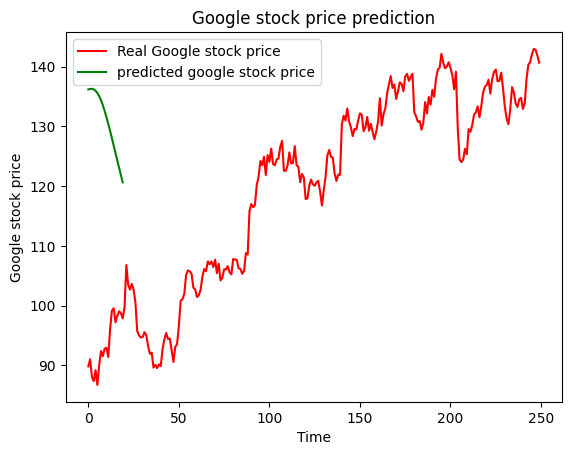

In [ ]:
#visualization
plt.plot(real_stock_price,color='red',label='Real Google stock price')
plt.plot(predicted_stock_price,color='green',label='predicted google stock price')
plt.title('Google stock price prediction')
plt.xlabel('Time')
plt.ylabel('Google stock price')
plt.legend()
plt.show()